# 📘 Data Science Cookbook  

**Marlyne Nitunga**  

Introduction to Data Science (CS215)  

Spring 2025

Date: May 11, 2025




In this cookbook, I will be applying what I've learnt in the introduction to Data Science through the following recipes

In [ ]:
# Let's start with importing libraries
import requests
import json
from bs4 import BeautifulSoup
import requests

from urllib.parse import unquote, quote
from datetime import datetime


import pandas as pd
import numpy as np

import matplotlib.cm as cm
import numpy as np

n = len(df_region)
colors = cm.tab20.colors[:n]  # or use cm.Set3, cm.Paired, etc.

import seaborn as sns


Recipe 1: Data analytics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Create the dataframe for the csv file reading the data

df = pd.read_csv("/content/drive/MyDrive/CS215/womens-economic-opportunity-2012-index.csv")
df

,Entity,Code,Year,WEO Index overall score (Economist Intelligence Unit (2012))
0,APEC,NaN,2012,63.200001
1,ASEAN,NaN,2012,52.200001
2,Africa,NaN,2012,41.599998
3,Albania,ALB,2012,56.473900
4,Algeria,DZA,2012,39.656799
...,...,...,...,...
153,Venezuela,VEN,2012,51.806198
154,Vietnam,VNM,2012,47.128101
155,Western Europe,NaN,2012,80.099998
156,Yemen,YEM,2012,24.644800


In [ ]:
#check for the unique entities so we can see what unique countries are listed
df["Entity"].unique()

array(['APEC', 'ASEAN', 'Africa', 'Albania', 'Algeria', 'All countries',
       'Americas', 'Argentina', 'Armenia', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Chad', 'Chile', 'China', 'Colombia', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Czechia', 'Denmark',
       'Dominican Republic', 'EBRD', 'EU', 'East Asia & Pacific',
       'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Ethiopia', 'Europe', 'Europe & Central Asia', 'Fiji', 'Finland',
       'France', 'G20', 'Georgia', 'Germany', 'Ghana', 'Greece', 'HIPC',
       'High income', 'High income (OECD)', 'High income (non-OECD)',
       'Honduras', 'Hong Kong', 'Hungary', 'IBRD', 'IDA', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Jordan', 'Kazakhstan',

In [ ]:
#parse through different regions to see the difference in WEO by creating a new df
df_region = df[df["Entity"].isin(["Africa", "ASEAN", "Western Europe", "East Asia & Pacific", "EU","Latin America & the Caribbean", "Europe & Central Asia", "Pacific Islands","Oceania", "South Asia", "Sub-Saharan Africa" ])]
df_region

,Entity,Code,Year,WEO Index overall score (Economist Intelligence Unit (2012))
1,ASEAN,NaN,2012,52.200001
2,Africa,NaN,2012,41.599998
38,EU,NaN,2012,76.699997
39,East Asia & Pacific,NaN,2012,44.299999
47,Europe & Central Asia,NaN,2012,56.299999
79,Latin America & the Caribbean,NaN,2012,55.599998
105,Oceania,NaN,2012,49.299999
107,Pacific Islands,NaN,2012,37.200001
127,South Asia,NaN,2012,41.099998
131,Sub-Saharan Africa,NaN,2012,40.299999


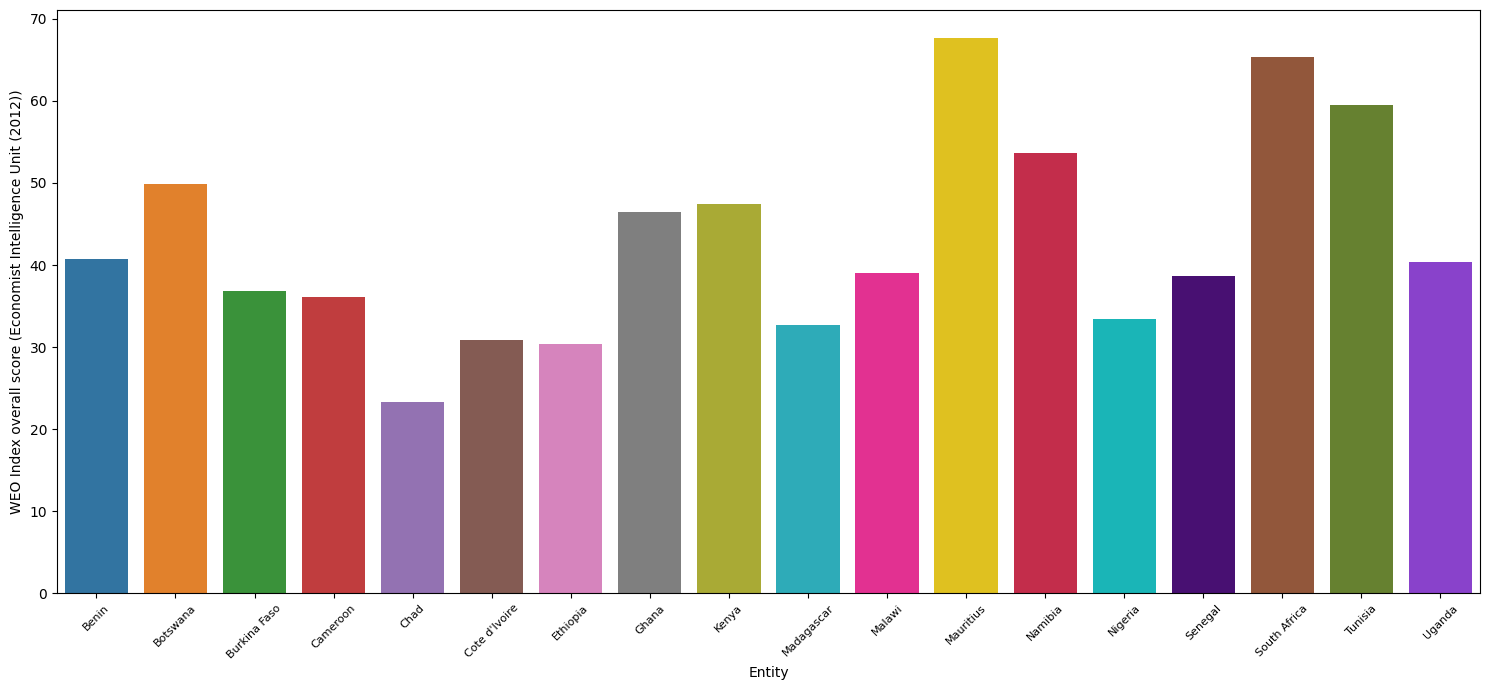

In [47]:
#A Visual representation of the difference in WEO in different regions
df_africa = df[df["Entity"].isin([
    'Benin', 'Botswana', 'Burkina Faso', 'Cameroon', 'Chad',
    "Cote d'Ivoire", 'Ethiopia', 'Ghana', 'Kenya', 'Madagascar',
    'Malawi', 'Mauritius', 'Namibia', 'Nigeria', 'Senegal',
    'South Africa', 'Tunisia', 'Uganda'
])]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#ff1493', '#FFD700', '#DC143C', '#00CED1', '#4B0082',
          '#A0522D', '#6B8E23', '#8A2BE2']

plt.figure(figsize=(15, 7))
sns.barplot(data=df_africa, x="Entity", y="WEO Index overall score (Economist Intelligence Unit (2012))",
            hue="Entity", palette=colors, dodge=False)
plt.xticks(rotation=45, fontsize=8)
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

#I was shocked to see that Pacific Islands have very low WEO as compared to other countries

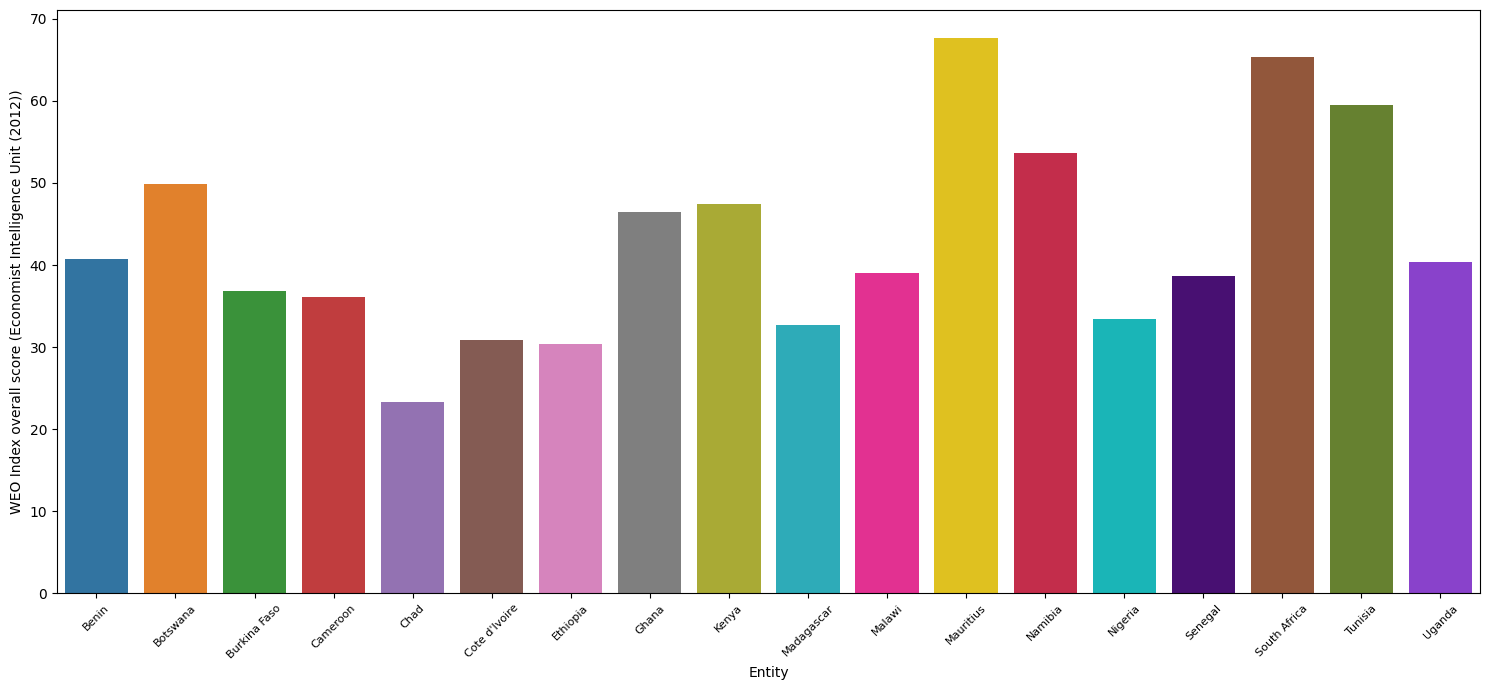

In [46]:
#Then I was curious about the African continent and the differce in WEO, but I am still not sure why only South Africa and sub-saharan Africa was included in the
df_africa = df[df["Entity"].isin([
    'Benin', 'Botswana', 'Burkina Faso', 'Cameroon', 'Chad',
    "Cote d'Ivoire", 'Ethiopia', 'Ghana', 'Kenya', 'Madagascar',
    'Malawi', 'Mauritius', 'Namibia', 'Nigeria', 'Senegal',
    'South Africa', 'Tunisia', 'Uganda'
])]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#ff1493', '#FFD700', '#DC143C', '#00CED1', '#4B0082',
          '#A0522D', '#6B8E23', '#8A2BE2']

plt.figure(figsize=(15, 7))
sns.barplot(df_africa, x="Entity", y="WEO Index overall score (Economist Intelligence Unit (2012))",
            hue="Entity", palette=colors, dodge=False)
plt.xticks(rotation=45, fontsize=8)
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


In [ ]:
# I wanted to check the difference between different income groups
df_income_groups = df[df["Entity"].isin([ "Upper-middle income","High income (OECD)", "High income (non-OECD)","Lower-middle income","Low income"])]
df_income_groups

,Entity,Code,Year,WEO Index overall score (Economist Intelligence Unit (2012))
58,High income (OECD),NaN,2012,79.199997
59,High income (non-OECD),NaN,2012,60.500000
83,Low income,NaN,2012,38.500000
84,Lower-middle income,NaN,2012,44.500000
149,Upper-middle income,NaN,2012,59.299999


<ipython-input-49-1bd0dfd00be7>:3: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(


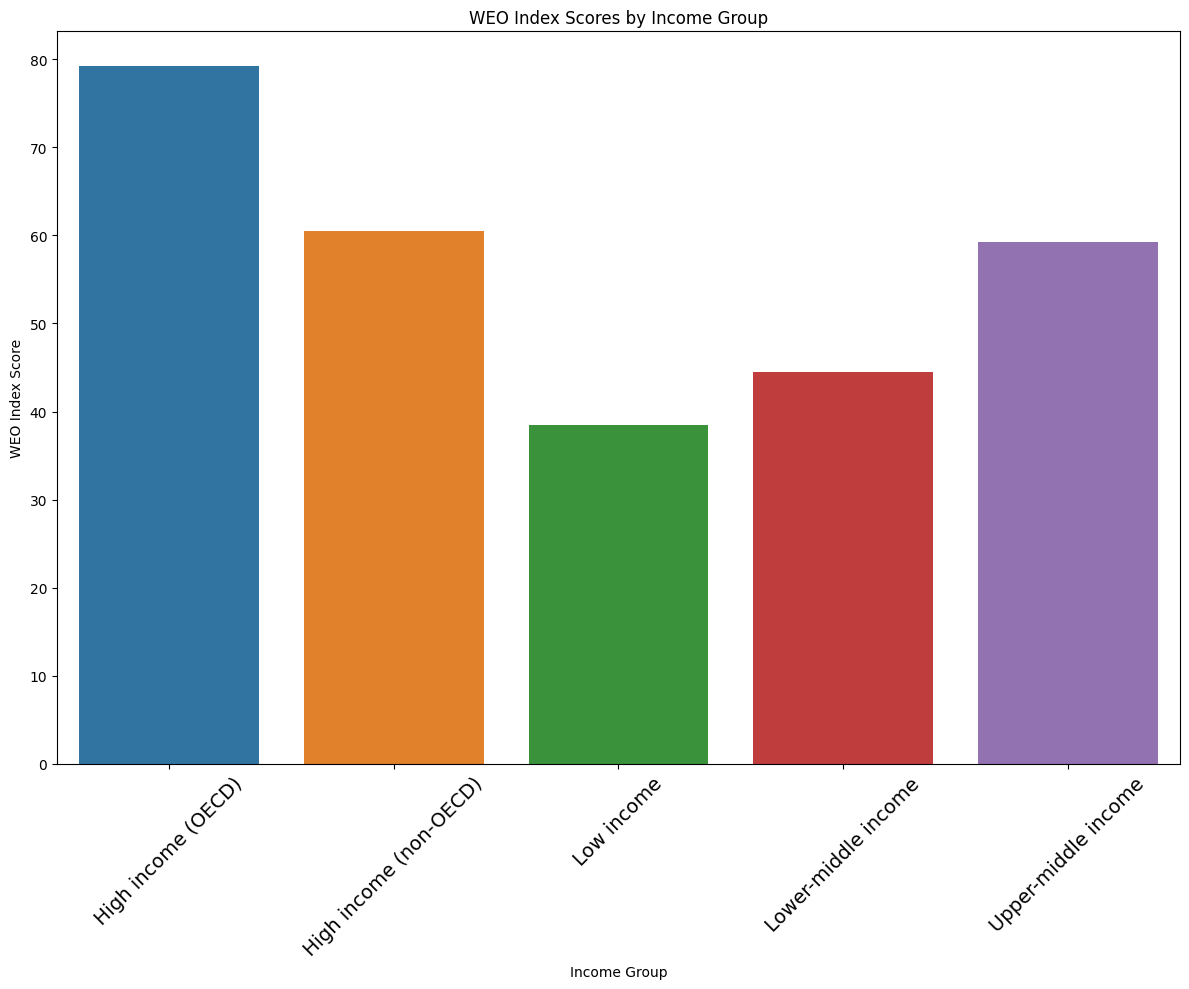

In [49]:
plt.figure(figsize=(12, 10))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#17becf']
sns.barplot(
    data=df_income_groups,
    x="Entity",
    y="WEO Index overall score (Economist Intelligence Unit (2012))",
    hue="Entity", palette=colors, dodge=False)
plt.xticks(rotation=45, fontsize=14)
plt.title("WEO Index Scores by Income Group")
plt.ylabel("WEO Index Score")
plt.xlabel("Income Group")
plt.tight_layout()
plt.show()


In [ ]:
#this one was very interesting, as initially I didnt know about the different economic organizations
df_economic_groups = df[df["Entity"].isin([ "Non-OECD","APEC","G20", "IBRD","EBRD" ,"OECD"])]
df_economic_groups

,Entity,Code,Year,WEO Index overall score (Economist Intelligence Unit (2012))
0,APEC,NaN,2012,63.200001
37,EBRD,NaN,2012,58.700001
51,G20,NaN,2012,71.099998
63,IBRD,NaN,2012,55.200001
101,Non-OECD,NaN,2012,49.200001
104,OECD,NaN,2012,77.500000


<ipython-input-50-c0d5c931a6c4>:5: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


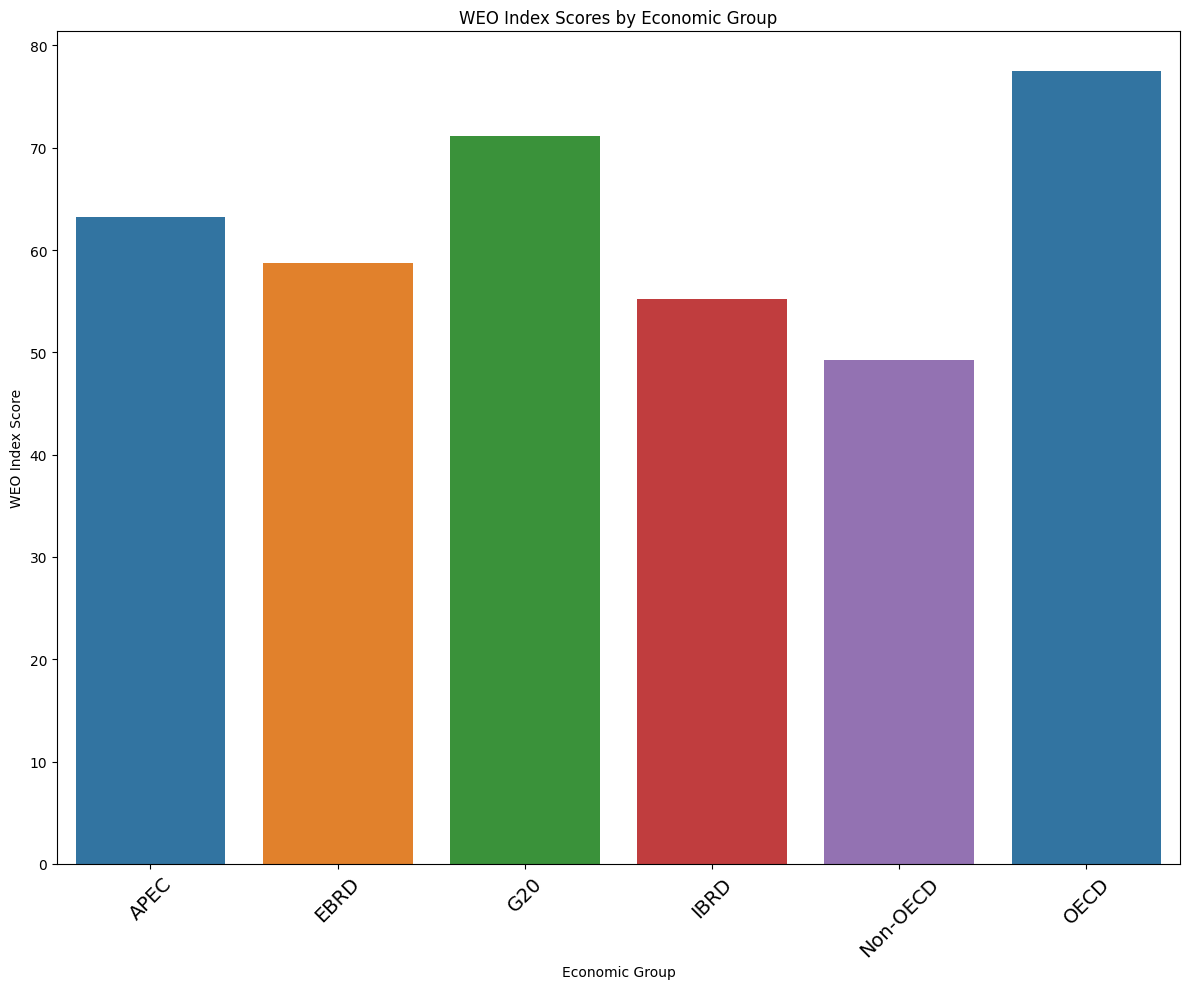

In [50]:
#we can see that Organisation for Economic Co-operation and Development had the highest WEO
# OECD consists of 38 member states including North America, EU, Asia and South America
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.figure(figsize=(12, 10))
sns.barplot(
    data=df_economic_groups,
    x="Entity",
    y="WEO Index overall score (Economist Intelligence Unit (2012))",
    hue="Entity", palette=colors, dodge=False
)
plt.xticks(rotation=45, fontsize=14)
plt.title("WEO Index Scores by Economic Group")
plt.ylabel("WEO Index Score")
plt.xlabel("Economic Group")
plt.tight_layout()
plt.show()


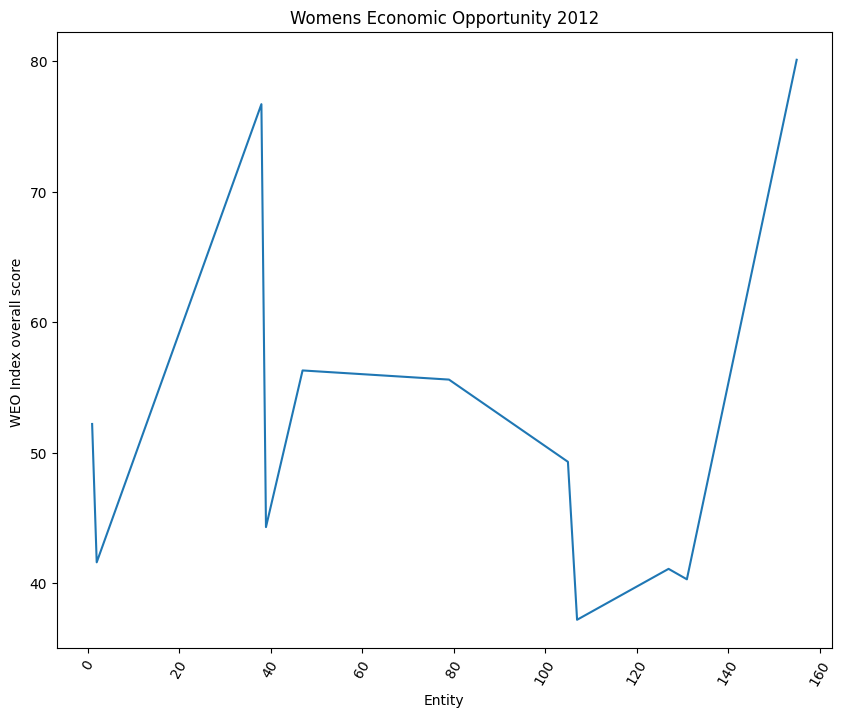

In [ ]:
#simple scatter plot to show a scatter plot of different regions

#first assignt he figure size and the axes point for the scatter plot
fig, axs = plt.subplots(figsize=(10, 8))

#then get the column you would want to represnt mainly in your scatter plot
#after that get the kind of line you would want (i.e: line/dash...), and the rot if the angle of your tick lable.
#ax is for the axes object on whihc your plot is created

df_region['WEO Index overall score (Economist Intelligence Unit (2012))'].plot(kind='line', rot=60, ax=axs)

#declaring your lables and titles
plt.xlabel("Entity")  # custom x label using Matplotlib

plt.ylabel("WEO Index overall score ")
plt.title('Womens Economic Opportunity 2012')

#to print your graph
plt.show()

Recipe 2, Web scrapping

In [ ]:
# web scrapping and navigating websites, I chose Bloomberg as I look up to the company

#first get ther URL of the website you want to scrape on
bl_url='https://www.bloomberg.com/company'

# request to get the urls information
bl_resp= requests.get(bl_url)

#create a soup to parse on the whole websites content to later use ot to scrape
soup = BeautifulSoup(bl_resp.content, 'html.parser')
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Bloomberg - Are you a robot?</title>
<style rel="stylesheet">
                @font-face {
                    font-family: BWHaasGroteskWeb;
                    font-display: swap;
                    font-weight: 400;
                    font-style: normal;
                    src: url('https://assets.bwbx.io/s3/fontservice/fonts/BWHaasGrotesk-55Roman-Web-7998fbcba8.eot');
                    src: local('?'), url('https://assets.bwbx.io/s3/fontservice/fonts/BWHaasGrotesk-55Roman-Web-5cf5733cd9.woff2') format('woff2'), url('https://assets.bwbx.io/s3/fontservice/fonts/BWHaasGrotesk-55Roman-Web-a1ea4fd367.woff') format('woff')
                }

                @font-face {
                    font-family: BWHaasGroteskWeb;
                    font-display: swap;
                    font-weight: 700;
                    font-style: normal;
       

In [ ]:
#since I couldnt parse through the full information, I wanted to read out properly the text and reason for which I couldnt get the full information
#of the website, so I wanted to make it more legible and found out it was because the website thought I was a robot

section=soup.find_all(['section'])
for item in section:
    print(item.text)



We've detected unusual activity from your computer network
To continue, please click the box below to let us know you're not a robot.




Why did this happen?
Please make sure your browser supports JavaScript and cookies and that you are not
                    blocking them from loading.
                    For more information you can review our Terms of Service 
                    and Cookie Policy.


Need Help?
For inquiries related to this message please contact
                        our support team and provide the reference ID below.
Block reference ID:fff66900-2ede-11f0-bbbc-d6a1fcca3d6f


Get the most important global markets news at your fingertips with a Bloomberg.com subscription.
SUBSCRIBE NOW



Why did this happen?
Please make sure your browser supports JavaScript and cookies and that you are not
                    blocking them from loading.
                    For more information you can review our Terms of Service 
                    and Cookie Policy.


Need H

Recipe 3, API and Json Parsing

In [ ]:
#I am very much interested in makeup products and I wanted to get the api for it to make data anlysis
# first I try to read the url and using requests, I parse through the url
makeup_url= 'https://makeup-api.herokuapp.com/api/v1/products.json'
makeup_response= requests.get(makeup_url)
#I wanted to make sure that I was parsing through the right url so I wanted to check the status
#200 means successful
status = makeup_response.status_code
print(status)

200


In [ ]:
#then I want to get the api in json format as its more legible
makeup= makeup_response.json()
makeup

[{'id': 1048,
  'brand': 'colourpop',
  'name': 'Lippie Pencil',
  'price': '5.0',
  'price_sign': '$',
  'currency': 'CAD',
  'image_link': 'https://cdn.shopify.com/s/files/1/1338/0845/collections/lippie-pencil_grande.jpg?v=1512588769',
  'product_link': 'https://colourpop.com/collections/lippie-pencil',
  'website_link': 'https://colourpop.com',
  'description': 'Lippie Pencil A long-wearing and high-intensity lip pencil that glides on easily and prevents feathering. Many of our Lippie Stix have a coordinating Lippie Pencil designed to compliment it perfectly, but feel free to mix and match!',
  'rating': None,
  'category': 'pencil',
  'product_type': 'lip_liner',
  'tag_list': ['cruelty free', 'Vegan'],
  'created_at': '2018-07-08T23:45:08.056Z',
  'updated_at': '2018-07-09T00:53:23.301Z',
  'product_api_url': 'https://makeup-api.herokuapp.com/api/v1/products/1048.json',
  'api_featured_image': '//s3.amazonaws.com/donovanbailey/products/api_featured_images/000/001/048/original/open

In [ ]:
#I wanted to create a list of brands that were listed in the api
brands = []
for i in makeup:
    name = i.get('brand')
    brands.append(name)

In [ ]:
#I will remove any whitespace there is in the brand names for brands with more than 1 word and replace it with a - so I can create a url out of it
def whitespace(lists):
    for i in range(len(lists)):
        if isinstance(lists[i],str):
            lists[i] = lists[i].replace(' ', '-')
    return lists

In [ ]:
#now we have the cleaned brands name

cleaned_brands = whitespace(brands)
cleaned_brands

['colourpop',
 'colourpop',
 'colourpop',
 'colourpop',
 'boosh',
 'deciem',
 'deciem',
 'zorah-biocosmetiques',
 'zorah-biocosmetiques',
 'w3llpeople',
 "sally-b's-skin-yummies",
 "sally-b's-skin-yummies",
 'rejuva-minerals',
 'rejuva-minerals',
 'rejuva-minerals',
 'rejuva-minerals',
 'rejuva-minerals',
 'rejuva-minerals',
 'penny-lane-organics',
 'nudus',
 'marienatie',
 'marienatie',
 'marienatie',
 'marienatie',
 'marienatie',
 'marienatie',
 'marienatie',
 'marienatie',
 'marienatie',
 "maia's-mineral-galaxy",
 'lotus-cosmetics-usa',
 'lotus-cosmetics-usa',
 'lotus-cosmetics-usa',
 'lotus-cosmetics-usa',
 'lotus-cosmetics-usa',
 'lotus-cosmetics-usa',
 'lotus-cosmetics-usa',
 'green-people',
 'coastal-classic-creation',
 "c'est-moi",
 "c'est-moi",
 "c'est-moi",
 "c'est-moi",
 'alva',
 'glossier',
 'glossier',
 'glossier',
 'glossier',
 'glossier',
 'glossier',
 'nyx',
 'nyx',
 'nyx',
 'nyx',
 'nyx',
 'nyx',
 'nyx',
 'nyx',
 'nyx',
 'nyx',
 'nyx',
 'nyx',
 'nyx',
 'nyx',
 'nyx',
 

In [ ]:
#I wanted to try and create a direct link to the api for each brand so I used the list of brands name gotten previously

def makeup_brand():
    brand = cleaned_brands
    for i in range(len(brand)):
        if brand[i] is not None:
            beauty_url = 'https://makeup-api.herokuapp.com/api/v1/products.json?brand='
            url = beauty_url + brand[i]
            print(url)

In [ ]:
#so now we have specific links for every makebrand
makeup_brand()
#although some links dont work as brands with more than one word in the name, was given specific ids and not their own names

https://makeup-api.herokuapp.com/api/v1/products.json?brand=colourpop
https://makeup-api.herokuapp.com/api/v1/products.json?brand=colourpop
https://makeup-api.herokuapp.com/api/v1/products.json?brand=colourpop
https://makeup-api.herokuapp.com/api/v1/products.json?brand=colourpop
https://makeup-api.herokuapp.com/api/v1/products.json?brand=boosh
https://makeup-api.herokuapp.com/api/v1/products.json?brand=deciem
https://makeup-api.herokuapp.com/api/v1/products.json?brand=deciem
https://makeup-api.herokuapp.com/api/v1/products.json?brand=zorah-biocosmetiques
https://makeup-api.herokuapp.com/api/v1/products.json?brand=zorah-biocosmetiques
https://makeup-api.herokuapp.com/api/v1/products.json?brand=w3llpeople
https://makeup-api.herokuapp.com/api/v1/products.json?brand=sally-b's-skin-yummies
https://makeup-api.herokuapp.com/api/v1/products.json?brand=sally-b's-skin-yummies
https://makeup-api.herokuapp.com/api/v1/products.json?brand=rejuva-minerals
https://makeup-api.herokuapp.com/api/v1/produ

In [ ]:
#as I read through the json, I see that each brand name has their own specific product url, so I get it by parsing through the makeup list
api_url_links = []
for i in makeup:
    links = i.get('product_api_url')
    api_url_links.append(links)
api_url_links

['https://makeup-api.herokuapp.com/api/v1/products/1048.json',
 'https://makeup-api.herokuapp.com/api/v1/products/1047.json',
 'https://makeup-api.herokuapp.com/api/v1/products/1046.json',
 'https://makeup-api.herokuapp.com/api/v1/products/1045.json',
 'https://makeup-api.herokuapp.com/api/v1/products/1044.json',
 'https://makeup-api.herokuapp.com/api/v1/products/1043.json',
 'https://makeup-api.herokuapp.com/api/v1/products/1042.json',
 'https://makeup-api.herokuapp.com/api/v1/products/1041.json',
 'https://makeup-api.herokuapp.com/api/v1/products/1040.json',
 'https://makeup-api.herokuapp.com/api/v1/products/1039.json',
 'https://makeup-api.herokuapp.com/api/v1/products/1038.json',
 'https://makeup-api.herokuapp.com/api/v1/products/1037.json',
 'https://makeup-api.herokuapp.com/api/v1/products/1036.json',
 'https://makeup-api.herokuapp.com/api/v1/products/1035.json',
 'https://makeup-api.herokuapp.com/api/v1/products/1034.json',
 'https://makeup-api.herokuapp.com/api/v1/products/1033

In [ ]:
#I tried to do the previous step in another way, by making a function that gets the url links
def makeup_brand_with_url_link():
    link_url = api_url_links
    for i in (link_url):
        print(i)

In [ ]:
makeup_brand_with_url_link()

https://makeup-api.herokuapp.com/api/v1/products/1048.json
https://makeup-api.herokuapp.com/api/v1/products/1047.json
https://makeup-api.herokuapp.com/api/v1/products/1046.json
https://makeup-api.herokuapp.com/api/v1/products/1045.json
https://makeup-api.herokuapp.com/api/v1/products/1044.json
https://makeup-api.herokuapp.com/api/v1/products/1043.json
https://makeup-api.herokuapp.com/api/v1/products/1042.json
https://makeup-api.herokuapp.com/api/v1/products/1041.json
https://makeup-api.herokuapp.com/api/v1/products/1040.json
https://makeup-api.herokuapp.com/api/v1/products/1039.json
https://makeup-api.herokuapp.com/api/v1/products/1038.json
https://makeup-api.herokuapp.com/api/v1/products/1037.json
https://makeup-api.herokuapp.com/api/v1/products/1036.json
https://makeup-api.herokuapp.com/api/v1/products/1035.json
https://makeup-api.herokuapp.com/api/v1/products/1034.json
https://makeup-api.herokuapp.com/api/v1/products/1033.json
https://makeup-api.herokuapp.com/api/v1/products/1032.js

Recipe 4, Get the information of Maybelline brand, since I personally use the brand

In [ ]:
#parsing through the api for maybelline products
maybelline_url= 'https://makeup-api.herokuapp.com/api/v1/products.json?brand=maybelline'
maybelline_response= requests.get(maybelline_url)
status = maybelline_response.status_code
print(status)

200


In [ ]:
#As a user I wanted to make my life easier and check for the maybelline products with different ratings so I can easliy pick on prodcuts with high rating
# Extract JSON data from the response

maybelline = maybelline_response.json()

# Loop through the products
for b in maybelline:
    name = b.get('name')
    rating = b.get('rating')
    print(name, "is rated as", rating)



Maybelline Face Studio Master Hi-Light Light Booster Bronzer is rated as 5.0
Maybelline Fit Me Bronzer is rated as 4.5
Maybelline Facestudio Master Contour Kit is rated as None
Maybelline Face Studio Master Hi-Light Light Booster Blush is rated as None
Maybelline Face Studio Master Hi-Light Light Booster Blush  is rated as 5.0
Maybelline Fit Me Blush is rated as 4.8
Maybelline Dream Bouncy Blush is rated as 4.5
Maybelline Color Sensational Lipliner is rated as 3.5
Maybelline Dream Smooth Mousse Foundation is rated as 3.8
Maybelline Fit Me Shine-Free Foundation Stick is rated as 4.7
Maybelline Dream Matte Mousse Foundation is rated as 4.4
Maybelline Mineral Power Natural Perfecting Powder Foundation is rated as 3.9
Maybelline Dream Velvet Foundation is rated as 2.5
Maybelline Superstay Better Skin Foundation  is rated as 3.0
Maybelline Dream Wonder Liquid Touch Foundation is rated as None
Maybelline Dream Liquid Mousse is rated as 4.4
Maybelline FIT ME! Matte + Poreless Foundation is ra